# Notebook A
## Exploração de Dados 2018/2019 
### Nelson Costa 42983
### Armando Sousa 76498

## Index
- [Task A - Pre Processing](#Task-A---Pre-Processing)
 - [Checking missing values](#Checking-if-datasets-have-missing-values)
 - [Handling categorical data](#Handling-categorical-data)
 - [Encoding class labels](#Encoding-class-labels)
 - [Partitioning datasets](#Partitioning-datasets-in-training-and-test-sets)
 - [Rank features](#Rank-features)
   - [Univariate Feature Selection](#1.-Univariate-Feature-Selection)
     - [1. Mutual Info Classif](#1.-Mutual-Info-Classif)
     - [2. Chi-squared](#2.-Chi-squared)
 - [Dimension reduction](#Dimension-reduction)
   - [Principal Component Analysis - Banknotes](#PCA---Banknotes-dataset)
   - [Kernel PCA - Banknotes](#KPCA---Banknotes-dataset)
   - [Principal Component Analysis - Nursery](#PCA---Nursery-dataset)
   - [Kernel PCA - Nursery](#KPCA---Nursery-dataset)
- [Task B - Predictive Model](#Task-B---Predictive-Model)
 - [Multilayer Perceptron - Banknotes dataset](#MLP---Banknotes-dataset)
 - [Support Vector Machine - Banknotes dataset](#SVM---Banknotes-dataset)
 - [Multilayer Perceptron - Nursery dataset](#MLP---Nursery-dataset)
 - [Support Vector Machine - Nursery dataset](#SVM---Nursery-dataset)
- [Task C - Evaluation](#Task-C---Evaluation)

 


In [1]:
import pandas as pd
import numpy as np
import xlrd
import copy
%matplotlib inline

In [2]:
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Reading datasets

### Banknotes dataset

In [3]:
df_bankNotes = pd.read_excel('./data_banknote_authentication.xlsx')
#df_bankNotes

### Nursery dataset

In [4]:
df_nursery = pd.read_excel('./nursery.xlsx')
#df_nursery

# Task A - Pre Processing

## Checking if datasets have missing values

### Banknotes dataset

In [5]:
df_bankNotes.isnull().sum()

variance of Wavelet Transformed image    0
skewness of Wavelet Transformed image    0
curtosis of Wavelet Transformed image    0
entropy of image                         0
class                                    0
dtype: int64

### Nursery dataset

In [6]:
df_nursery.isnull().sum()

parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
class       0
dtype: int64

## Handling categorical data

### Mapping ordinal features

#### Nursery dataset

In [7]:
# print features before mapping
#df_nursery[df_nursery.columns[0:8]]

In [8]:
# get dataset copy
df_nursery_copy = df_nursery.copy()

# cast data to string
df_nursery_copy = df_nursery_copy.astype(str)

# map features
parents_mapping = {'usual':1, 'pretentious':2, 'great_pret':3}
df_nursery_copy['parents'] = df_nursery_copy['parents'].map(parents_mapping)

has_nurs_mapping = {'proper':1, 'less_proper':2, 'improper':3, 'critical':4, 'very_crit':5}
df_nursery_copy['has_nurs'] = df_nursery_copy['has_nurs'].map(has_nurs_mapping)

form_mapping = {'complete':1, 'completed':2, 'incomplete':3, 'foster':4}
df_nursery_copy['form'] = df_nursery_copy['form'].map(form_mapping)

children_mapping = {'1':1, '2':2, '3':3, 'more':4}
df_nursery_copy['children'] = df_nursery_copy['children'].map(children_mapping)

housing_mapping = {'convenient':1, 'less_conv':2, 'critical':3}
df_nursery_copy['housing'] = df_nursery_copy['housing'].map(housing_mapping)

finance_mapping = {'convenient':1, 'inconv':2}
df_nursery_copy['finance'] = df_nursery_copy['finance'].map(finance_mapping)

social_mapping = {'nonprob':1, 'slightly_prob':2, 'problematic':3}
df_nursery_copy['social'] = df_nursery_copy['social'].map(social_mapping)

health_mapping = {'recommended':1, 'priority':2, 'not_recom':3}
df_nursery_copy['health'] = df_nursery_copy['health'].map(health_mapping)

In [9]:
# print features after mapping
df_nursery_copy[df_nursery_copy.columns[0:8]]

,parents,has_nurs,form,children,housing,finance,social,health
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,2
2,1,1,1,1,1,1,1,3
3,1,1,1,1,1,1,2,1
4,1,1,1,1,1,1,2,2
5,1,1,1,1,1,1,2,3
6,1,1,1,1,1,1,3,1
7,1,1,1,1,1,1,3,2
8,1,1,1,1,1,1,3,3
9,1,1,1,1,1,2,1,1


## Encoding class labels

### Nursery dataset

In [10]:
# print labels before encoding
#df_nursery_copy[df_nursery_copy.columns[8]]

In [11]:
class_mapping = {label:idx for idx,label in enumerate(np.unique(df_nursery_copy[df_nursery_copy.columns[8]]))}

class_mapping

{'not_recom': 0,
 'priority': 1,
 'recommend': 2,
 'spec_prior': 3,
 'very_recom': 4}

In [12]:
# map labels
df_nursery_copy[df_nursery_copy.columns[8]] = df_nursery_copy[df_nursery_copy.columns[8]].map(class_mapping)

In [13]:
# print labels after encoding
df_nursery_copy[df_nursery_copy.columns[8]]

0        2
1        1
2        0
3        2
4        1
5        0
6        1
7        1
8        0
9        4
10       1
11       0
12       4
13       1
14       0
15       1
16       1
17       0
18       4
19       1
20       0
21       4
22       1
23       0
24       1
25       1
26       0
27       4
28       1
29       0
        ..
12930    3
12931    3
12932    0
12933    3
12934    3
12935    0
12936    3
12937    3
12938    0
12939    3
12940    3
12941    0
12942    3
12943    3
12944    0
12945    3
12946    3
12947    0
12948    3
12949    3
12950    0
12951    3
12952    3
12953    0
12954    3
12955    3
12956    0
12957    3
12958    3
12959    0
Name: class, Length: 12960, dtype: int64

## Partitioning datasets in training and test sets

In [14]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

### Banknotes dataset

In [15]:
# labels reading
y1=df_bankNotes[df_bankNotes.columns[4]]
# features reading
X1=df_bankNotes[df_bankNotes.columns[0:4]]

# get training and test sets
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.3)

### Nursery dataset

In [16]:
# labels reading
y2=df_nursery_copy[df_nursery_copy.columns[8]]
# features reading
X2=df_nursery_copy[df_nursery_copy.columns[0:8]]

# get training and test sets
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size = 0.3)

## Rank features

### Univariate Feature Selection

Univariate feature selection selects the best features by running univariate statistical tests like **chi-squared test, F-1 test, and mutual information** methods.
Can't use the **chi-squared** function, if there are negative values.
#### 1. Mutual Info Classif

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

test = SelectKBest(score_func = mutual_info_classif, k=2)
test

SelectKBest(k=2, score_func=<function mutual_info_classif at 0x7f61870300d0>)

##### Banknotes dataset

In [18]:
test.fit(X_train1, y_train1)
num_features = len(X_train1.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train1.columns[i]))
        
print (sorted(scores, reverse = True))

[(0.37049997513464383, 'variance of Wavelet Transformed image'), (0.23779649995684493, 'skewness of Wavelet Transformed image'), (0.1311684035050158, 'curtosis of Wavelet Transformed image'), (0.03200283115948688, 'entropy of image')]


##### Nursery dataset

In [19]:
test.fit(X_train2, y_train2)
num_features = len(X_train2.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train2.columns[i]))
        
print (sorted(scores, reverse = True))

[(0.6647995435198615, 'health'), (0.14997363912448125, 'has_nurs'), (0.041234544454332944, 'parents'), (0.021325933364857885, 'housing'), (0.016534133999935197, 'social'), (0.016125393707318914, 'finance'), (0.00010869594161544427, 'children'), (0.0, 'form')]


#### 2. Chi-squared

In [20]:
from sklearn.feature_selection import chi2
test = SelectKBest(score_func = chi2, k=2)

##### Nursery dataset

In [21]:
test.fit(X_train2, y_train2)
num_features = len(X_train2.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train2.columns[i]))
        
print (sorted(scores, reverse = True))

[(2318.7171345649626, 'health'), (1420.5667831400992, 'has_nurs'), (271.3760340567696, 'parents'), (79.25061593726485, 'housing'), (60.51124457544577, 'children'), (50.64533751460062, 'social'), (37.89131320249682, 'form'), (9.598568778536489, 'finance')]


## Dimension reduction
### PCA - Banknotes dataset

Explained variance ratio: [0.76050555 0.14363093 0.06623885 0.02962467]


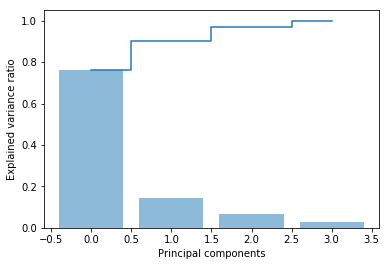

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(X_train1)

print("Explained variance ratio:",pca.explained_variance_ratio_)
range_value = pca.explained_variance_ratio_.shape[0]

plt.bar(range(range_value), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(range_value), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [23]:
# The eigenvectors
print('eigenvectors\n', pca.components_)
# singular values
print('singular_ values\n', pca.singular_values_)

eigenvectors
 [[-0.15149297 -0.80757428  0.55190138  0.14240272]
 [-0.79315527  0.2678294   0.29330984 -0.46167247]
 [ 0.41932587  0.46216909  0.7801819   0.0433792 ]
 [-0.41487398  0.24998187  0.02627551  0.87447026]]
singular_ values
 [219.58590473  95.42831403  64.80517037  43.33911451]


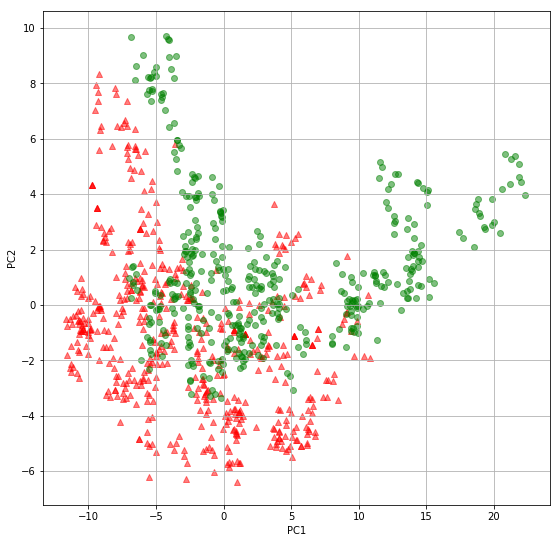

In [24]:
pca = PCA(n_components=2)
X_train_pca1 = pca.fit_transform(X_train1)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2,2,1) 

ax.scatter(X_train_pca1[y_train1 == 0, 0], X_train_pca1[y_train1 == 0, 1],
              color='red', marker='^', alpha=0.5)
ax.scatter(X_train_pca1[y_train1 == 1, 0], X_train_pca1[y_train1 == 1, 1],
              color='green', marker='o', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# plt.savefig('./figures/half_moon_2.png', dpi=300)
ax.grid()
plt.show()

X_train1_v1 = pd.DataFrame(data=X_train_pca1)

### KPCA - Banknotes dataset

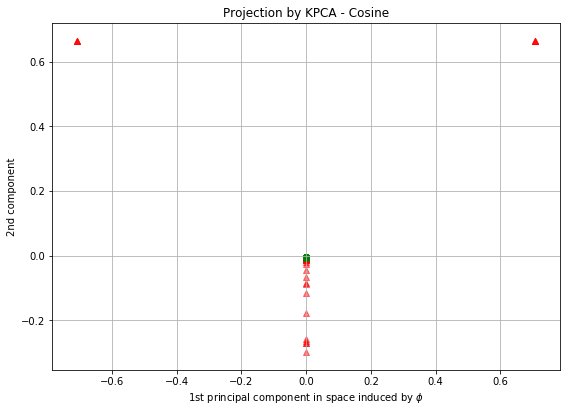

                0         1
0   -1.001091e-07 -0.003029
1   -9.771930e-08 -0.002956
2   -9.507293e-08 -0.002876
3   -1.461525e-07 -0.004430
4   -9.589037e-08 -0.002901
5   -1.062718e-07 -0.003216
6   -1.026502e-07 -0.003106
7   -9.508563e-08 -0.002876
8   -9.863470e-08 -0.002984
9   -1.035774e-07 -0.003134
10  -9.783063e-08 -0.002960
11  -9.728869e-08 -0.002943
12  -9.949460e-08 -0.003010
13  -1.381997e-07 -0.004189
14  -9.725765e-08 -0.002942
15  -1.099787e-07 -0.003341
16  -9.845898e-08 -0.002998
17  -1.194571e-07 -0.003618
18  -1.017990e-07 -0.003080
19  -9.507941e-08 -0.002876
20  -1.194904e-07 -0.003618
21  -9.507362e-08 -0.002876
22  -1.334495e-07 -0.004043
23  -9.540549e-08 -0.002886
24  -9.563011e-08 -0.002893
25  -1.149359e-07 -0.003480
26  -9.507293e-08 -0.002876
27  -9.532949e-08 -0.002884
28  -9.517297e-08 -0.002879
29  -1.684409e-07 -0.005110
..            ...       ...
930 -9.524107e-08 -0.002881
931 -9.511629e-08 -0.002877
932 -1.426106e-07 -0.004323
933 -9.792897e-08 -0

In [25]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA( n_components = 2, kernel="rbf", fit_inverse_transform=True, gamma=10)
X_train_kpca1 = kpca.fit_transform(X_train1)
fig = plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1, aspect='equal')

plt.scatter(X_train_kpca1[y_train1 == 0, 0], X_train_kpca1[y_train1 == 0, 1], c="red",
            marker='^', alpha=0.5)
plt.scatter(X_train_kpca1[y_train1 == 1, 0], X_train_kpca1[y_train1 == 1, 1], c="green",
            marker='o', alpha=0.5)
plt.title("Projection by KPCA - Cosine")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.grid()
plt.show()

X_train1_v2 = pd.DataFrame(data=X_train_kpca1)
print(X_train1_v2)

### PCA - Nursery dataset

Explained variance ratio: [0.27166673 0.16894741 0.16763046 0.09142943 0.08963854 0.0892412
 0.08790535 0.03354088]


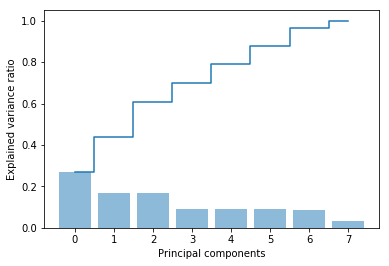

In [26]:
pca = PCA()
principalComponents = pca.fit_transform(X_train2)

print("Explained variance ratio:",pca.explained_variance_ratio_)
range_value = pca.explained_variance_ratio_.shape[0]

plt.bar(range(range_value), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(range_value), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [27]:
# The eigenvectors
print('eigenvectors\n', pca.components_)
# singular values
print('singular_ values\n', pca.singular_values_)

eigenvectors
 [[-9.25096877e-03 -9.99856785e-01 -8.52286025e-03  2.28861546e-03
  -1.01557787e-02 -9.66713302e-04  3.60855526e-03  2.41992690e-03]
 [-4.80082490e-03  5.72414540e-04 -3.11404115e-01 -9.50197955e-01
  -1.95430868e-03 -3.34512909e-04  3.88184336e-04  1.11294955e-02]
 [ 8.35927164e-03 -8.99007839e-03  9.49937437e-01 -3.11517800e-01
   1.28193082e-03  1.81793215e-06 -1.66202790e-02 -1.21223008e-02]
 [ 1.94347239e-01  4.76240755e-03 -4.30781192e-03 -5.38385448e-03
  -6.66467166e-01 -4.11671403e-04  3.55066605e-01 -6.26025543e-01]
 [-4.25412345e-01  2.03625142e-03 -1.42064493e-02  2.22834449e-03
  -1.77273073e-01  3.55205317e-03 -7.94995736e-01 -3.94153298e-01]
 [ 8.44068002e-01 -1.24250206e-02 -1.84899613e-02 -1.83938156e-03
   2.72202392e-01 -7.90246692e-04 -3.88967212e-01 -2.48312922e-01]
 [-2.61949143e-01 -4.80647229e-03 -3.38221234e-03 -6.15080087e-03
   6.70964146e-01  1.40147327e-03  3.00532107e-01 -6.25136685e-01]
 [-2.61468844e-03  9.74730050e-04  7.53182892e-05  3.18

In [28]:
# Only two components for illustration
pca = PCA(n_components=7)
X_train_pca2 = pca.fit_transform(X_train2)

X_train2_v1 = pd.DataFrame(data=X_train_pca2)

### KPCA - Nursery dataset

In [29]:
#from sklearn.decomposition import KernelPCA

#kpca = KernelPCA(n_components = 7 ,kernel="rbf", fit_inverse_transform=True, gamma=10)
#X_train_kpca2 = kpca.fit_transform(X_train2)

'''
fig= plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1, aspect='equal')

plt.scatter(X_train_kpca2[y_train2 == 0, 0], X_train_kpca2[y_train2 == 0, 1], c="red",
            marker='^', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 1, 0], X_train_kpca2[y_train2 == 1, 1], c="green",
            marker='o', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 2, 0], X_train_kpca2[y_train2 == 2, 1], c="cyan",
            marker='x', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 3, 0], X_train_kpca2[y_train2 == 3, 1], c="blue",
            marker='s', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 4, 0], X_train_kpca2[y_train2 == 4, 1], c="yellow",
            marker='*', alpha=0.5)
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.grid()
plt.show()
'''
#X_train2_v2 = pd.DataFrame(data=X_train_kpca2)

'\nfig= plt.figure(figsize=(20, 20))\n\nplt.subplot(2, 2, 1, aspect=\'equal\')\n\nplt.scatter(X_train_kpca2[y_train2 == 0, 0], X_train_kpca2[y_train2 == 0, 1], c="red",\n            marker=\'^\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 1, 0], X_train_kpca2[y_train2 == 1, 1], c="green",\n            marker=\'o\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 2, 0], X_train_kpca2[y_train2 == 2, 1], c="cyan",\n            marker=\'x\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 3, 0], X_train_kpca2[y_train2 == 3, 1], c="blue",\n            marker=\'s\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 4, 0], X_train_kpca2[y_train2 == 4, 1], c="yellow",\n            marker=\'*\', alpha=0.5)\nplt.title("Projection by KPCA")\nplt.xlabel("1st principal component in space induced by $\\phi$")\nplt.ylabel("2nd component")\nplt.grid()\nplt.show()\n'

## Task B - Predictive Model

In [30]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

### MLP - Banknotes dataset

In [31]:
from sklearn.neural_network import MLPClassifier

mlp_Dataset1 = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5), alpha=0.01, max_iter=5000)
mlp_Dataset1

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [32]:
# Código que encontrei online
#y_pred = mlp.predict(X_test1)
#accuracy_score(y_test1, y_pred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


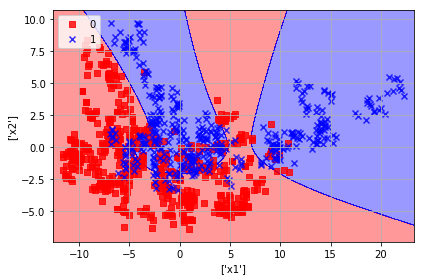

In [33]:
mlp_Dataset1 = mlp_Dataset1.fit(X_train1_v1.values,y_train1.values)
plot_decision_regions(X_train1_v1.values, y_train1.values, classifier=mlp_Dataset1)
plt.xlabel(['x1'])
plt.ylabel(['x2'])
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [34]:
print('Banknotes dataset')
print('the weights are \n',mlp_Dataset1.coefs_)
print('the bias \n ', mlp_Dataset1.intercepts_)
print('number of iterations \n', mlp_Dataset1.n_iter_)
print('output activation', mlp_Dataset1.out_activation_)

Banknotes dataset
the weights are 
 [array([[-0.64527556, -0.05880221, -1.00131172, -0.00536128, -0.14289665,
         0.21460992, -0.44713831, -0.42281127, -0.06847733, -0.09361817],
       [-0.6727224 , -0.10264225, -0.81772016, -0.43449229,  0.15605912,
         0.97436396,  0.02109797, -0.13369272,  0.05095533,  0.02322098]]), array([[ 0.49901686, -0.9449399 , -0.69453494, -0.20727175,  0.3367665 ],
       [-0.05910685, -0.78218421,  0.2502897 , -0.49701641,  1.03644642],
       [-0.34656071,  0.11426369, -0.62204228, -0.61369857,  1.209625  ],
       [-1.00656752, -0.36923917, -0.6956368 , -0.50055414,  0.93669255],
       [ 0.22741884, -0.68287631,  0.00690799, -0.74803307,  0.96617791],
       [ 0.33657098, -0.56137947,  0.51290709, -0.23190525,  1.04866051],
       [ 0.48387064,  0.91838152,  0.97851154,  0.70109483, -0.48184806],
       [ 1.08543338,  0.84668166,  0.19709601,  1.35338851,  0.13069158],
       [-0.85717968, -0.67921528, -0.52504432,  0.05692228,  0.32316785],
 

### MLP - Nursery dataset

In [35]:
mlp_Dataset2 = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5), alpha=0.01, max_iter=5000)
mlp_Dataset2

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [36]:
mlp_Dataset2 = mlp_Dataset2.fit(X_train2_v1.values,y_train2.values)
plot_decision_regions(X_train2_v1.values, y_train2.values, classifier=mlp_Dataset2)
plt.xlabel(['x1'])
plt.ylabel(['x2'])
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

ValueError: shapes (89060,2) and (7,10) not aligned: 2 (dim 1) != 7 (dim 0)

In [ ]:
print('Nursery dataset')
print('the weights are \n',mlp_Dataset2.coefs_)
print('the bias \n ', mlp_Dataset2.intercepts_)
print('number of iterations \n', mlp_Dataset2.n_iter_)
print('output activation', mlp_Dataset2.out_activation_)

### SVM - Banknotes dataset

In [37]:
from sklearn.svm import SVC

svm_Dataset1=SVC(C=1.0,kernel='rbf', max_iter=2000, tol=1e-05, verbose=0)
svm_Dataset1

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=2000, probability=False, random_state=None,
  shrinking=True, tol=1e-05, verbose=0)

/home/armando/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


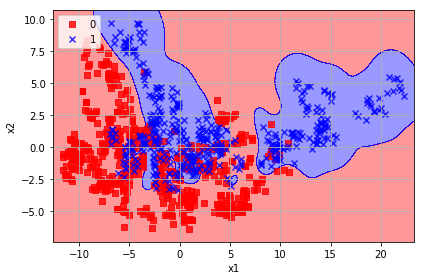

In [38]:
svm_Dataset1 = svm_Dataset1.fit(X_train1_v1.values, y_train1.values)

plot_decision_regions(X_train1_v1.values, y_train1.values, classifier=svm_Dataset1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [39]:
print('Banknotes dataset')
print('dual coef \n', svm_Dataset1.dual_coef_)
print ('support vectors \n', svm_Dataset1.support_vectors_)
print('index of support vectors \n ', svm_Dataset1.support_)
print ('bias', svm_Dataset1.intercept_)
print('the classifier \n', svm_Dataset1)

Banknotes dataset
dual coef 
 [[-0.89465734 -1.         -1.         -0.18906442 -1.         -1.
  -1.         -1.         -1.         -0.45759136 -0.18139621 -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -0.00439725 -1.         -1.
  -1.         -1.         -0.58690725 -1.         -0.50522447 -1.
  -1.         -0.40151823 -1.         -0.49936346 -1.         -1.
  -1.         -1.         -0.72790344 -1.         -0.31361274 -0.57639155
  -1.         -1.         -1.         -1.         -0.35795304 -1.
  -1.         -0.05967596 -1.         -0.34544705 -1.         -1.
  -1.         -1.         -1.         -0.18023555 -0.33894554 -1.
  -1.         -1.         -0.16400484 -1.         -0.59140356 -0.16060055
  -1.         -0.50238907 -1.         -1.         -1.         -1.
  -0.57538357 -1.         -1.         -0.41893687 -1.         -0.4467249
  -0.18731894 -0.31201394 -1.         -1.         -0.45802562 -1.
  -0.24877259 -1.      

### SVM - Nursery dataset

In [ ]:
svm_Dataset2=SVC(C=1.0,kernel='rbf', max_iter=4000, tol=1e-05, verbose=0)
svm_Dataset2

In [ ]:
svm_Dataset2 = svm_Dataset2.fit(X_train2_v1.values, y_train2.values)
plot_decision_regions(X_train2_v1.values, y_train2.values, classifier=svm_Dataset2)
#plt.xlabel('x1')
#plt.ylabel('x2')
#plt.legend(loc='upper left')
#plt.grid()
#plt.tight_layout()
#plt.show()

In [ ]:
print('Nursery dataset')
print('dual coef \n', svm_Dataset2.dual_coef_)
print ('support vectors \n', svm_Dataset2.support_vectors_)
print('index of support vectors \n ', svm_Dataset2.support_)
print ('bias', svm_Dataset2.intercept_)
print('the classifier \n', svm_Dataset2)

# Task C - Evaluation

## Holdout

In [48]:
pca = PCA(n_components=2)
X_test1_pca = pca.fit_transform(X_test1)
print("Accuracy of ",mlp_Dataset1.score(X_test1_pca,y_test1))

Accuracy of  0.8009708737864077


In [49]:
print("Accuracy of ",svm_Dataset1.score(X_test1_pca,y_test1))

Accuracy of  0.8349514563106796


In [50]:
from sklearn.metrics import accuracy_score
# Código que encontrei online
y_pred = mlp_Dataset1.predict(X_test1_pca)
print("MLP accuracy = ",accuracy_score(y_test1, y_pred))

y_pred = svm_Dataset1.predict(X_test1_pca)
print("SVM accuracy = ",accuracy_score(y_test1, y_pred))

MLP accuracy =  0.8009708737864077
SVM accuracy =  0.8349514563106796
